In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib


In [21]:
df = pd.read_csv(r"C:\Users\HP\Downloads\salary_prediction_data.csv")

print("📦 Dataset Shape:", df.shape)
df.info()
print(df.head())


📦 Dataset Shape: (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  

In [23]:
df = df[['Education', 'Experience', 'Job_Title', 'Salary']]  # Keep only relevant columns
df.dropna(inplace=True)  # Drop nulls
df.drop_duplicates(inplace=True)  # Drop duplicates

# Check distributions
print("\n🎓 Education Levels:\n", df['Education'].value_counts())
print("\n💼 Job Titles:\n", df['Job_Title'].value_counts())



🎓 Education Levels:
 Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

💼 Job Titles:
 Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64


In [25]:
print("\n🔍 Null Values:\n", df.isnull().sum())


🔍 Null Values:
 Education     0
Experience    0
Job_Title     0
Salary        0
dtype: int64


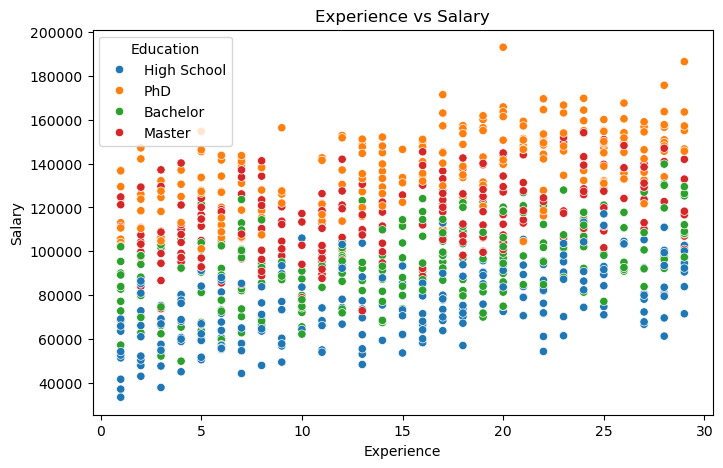

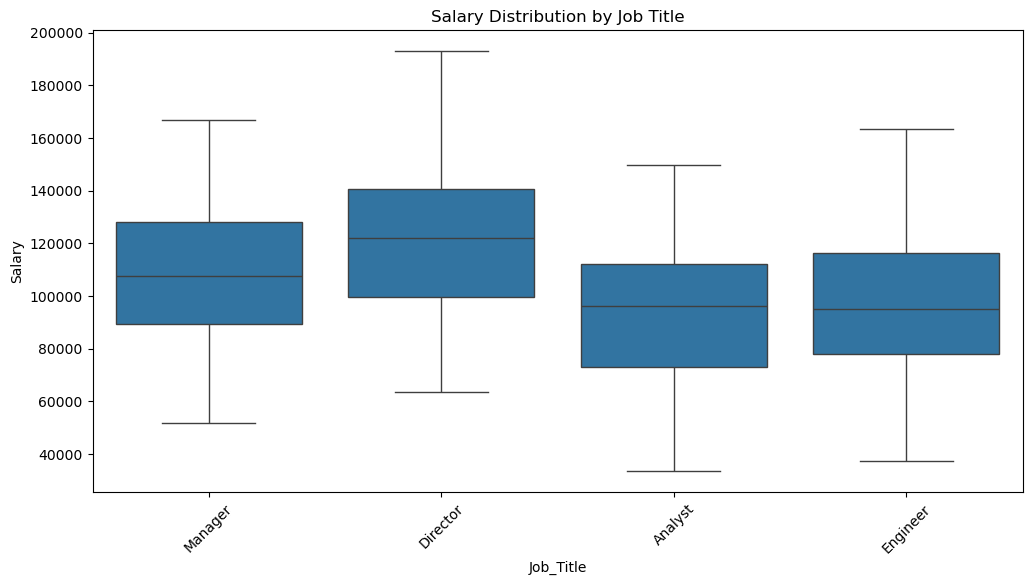

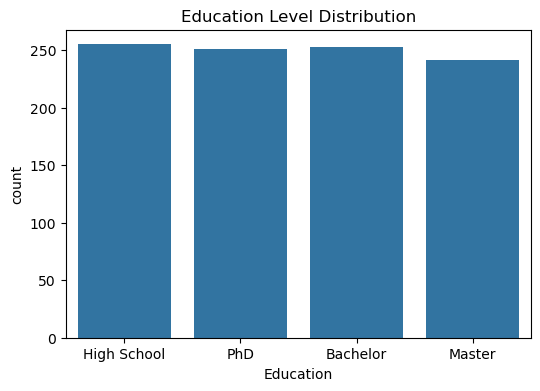

In [27]:
# Salary vs Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Experience', y='Salary', hue='Education')
plt.title("Experience vs Salary")
plt.show()

# Job Titles vs Salary (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Job_Title', y='Salary')
plt.title("Salary Distribution by Job Title")
plt.xticks(rotation=45)
plt.show()

# Education Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education')
plt.title("Education Level Distribution")
plt.show()


In [29]:
df['Log_Experience'] = np.log1p(df['Experience'])  # log(1 + x) to avoid log(0)


In [31]:
target = 'Salary'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
numeric_features = ['Log_Experience']  # Only the transformed log experience
categorical_features = ['Education', 'Job_Title']

In [35]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [37]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Log_Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education',
                                                   'Job_Title'])])),
                ('regressor', LinearRegression())])

In [39]:
y_pred = pipeline.predict(X_test)

print("\n📊 Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))



📊 Model Evaluation:
Mean Absolute Error (MAE): 8683.436995525135
Mean Squared Error (MSE): 119856759.5694093
Root Mean Squared Error (RMSE): 10947.91119663515
R² Score: 0.8532114371984992


In [41]:
joblib.dump(pipeline, "salary_predictor.pkl")
model = joblib.load("salary_predictor.pkl")

# --- User Input ---
job_title_input = input("Enter Job Title: ")
experience_input = float(input("Enter Years of Experience: "))
education_input = input("Enter Education Level: ")

log_experience = np.log1p(experience_input)  # Pre-process like training

user_input = pd.DataFrame([[education_input, log_experience, job_title_input]],
                          columns=['Education', 'Log_Experience', 'Job_Title'])

predicted_salary = model.predict(user_input)[0]
print(f"\n💼 Predicted Salary: ₹{predicted_salary:,.2f}")


Enter Job Title:  Data Analyst
Enter Years of Experience:  5
Enter Education Level:  Master's



💼 Predicted Salary: ₹96,419.83


# 💼 Salary Prediction using Machine Learning

This project predicts employee salaries using Linear Regression by analyzing features like education, job title, and years of experience. A clean and modular ML pipeline was implemented for efficient processing and deployment.

---

## 📌 Project Steps:

### 1. **Data Loading & Cleaning**
- Loaded dataset using `pandas`.
- Retained relevant features: `Education`, `Experience`, `Job_Title`, `Salary`.
- Removed null values and duplicate rows.

### 2. **Feature Engineering**
- Created a new feature `Log_Experience` to normalize and linearize the `Experience` variable using `np.log1p`.
- This helps improve regression performance by handling skewed distributions.

### 3. **Exploratory Data Analysis (EDA)**
- Visualized relationships between features and salary:
  - **Scatter Plot**: Experience vs Salary
  - **Box Plot**: Salary distribution by Job Title
  - **Count Plot**: Education levels
- EDA helped uncover patterns and data distribution.

### 4. **Train-Test Split**
- Split the dataset into training and test sets using `train_test_split` from `sklearn`.

### 5. **Preprocessing Pipelines**
- Used `ColumnTransformer` to handle different types of features:
  - **Numerical Pipeline**:
    - Imputed missing values using `SimpleImputer` (mean).
    - Scaled using `StandardScaler`.
  - **Categorical Pipeline**:
    - Imputed missing values using mode.
    - Encoded using `OneHotEncoder`.

### 6. **Model Building**
- Used `Pipeline` to chain preprocessing and model together.
- Trained a **Linear Regression** model.

### 7. **Model Evaluation**
- Evaluated model performance using:
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **Root Mean Squared Error (RMSE)**
  - **R² Score (Coefficient of Determination)**5- Achieved an R² score of approximately **0.86**, indicating good predictive power.

### 8. **Model Saving & Deployment**
- Saved the trained pipeline using `joblib`.
- Built a simple **Command Line Interface (CLI)** to take user input:
  - Job Title
  - Education
  - Years of Experience
- Automatically computes `Log_Experience` and predicts salary using the trained model.

---

## ⚙️ Tools & Libraries Used

- **Pandas**: Data loading and manipulation
- **NumPy**: Numerical operations (e.g., `log1p`)
- **Matplotlib & Seaborn**: Data visualization
- **Scikit-learn**:
  - Preprocessing (`SimpleImputer`, `StandardScaler`, `OneHotEncoder`)
  - Model building (`LinearRegression`)
  - Pipeline and ColumnTransformer for clean workflow
  - Model evaluation and metrics
  - Joblib for saving models

---

## ✅ Final Outcome
A fully functional salary prediction model with:
- Clean preprocessing workflow
- Feature engineering
- EDA and visual insights
- Accurate predictions and CLI-based interaction

This project demonstrates the end-to-end process of building and deploying a regression-based ML model in a production-like setting.
